In [1]:
import os

import numpy as np
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split

sns.set(style="darkgrid")
sns.set_context('talk')
%matplotlib inline

/home/joeldapello/anaconda3/envs/am207/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
get_data = lambda path : h5.File(path, 'r')['obj_arr'].value.astype('float32')[:,0]
flatten = lambda x : x.reshape(x.shape[0], -1)

def format_data(DIR):
    files = [os.path.join(DIR,file) for file in os.listdir(DIR)]
    feature_files = [file for file in files if 'features' in file]
    feature_names = [feature_file.split('/')[-1].split('(')[0] for feature_file in feature_files]
    feature_data = [flatten(get_data(feature_file)) for feature_file in feature_files]

    obss_file = [file for file in files if 'obss' in file][0]
    obss_data = flatten(get_data(obss_file))

    annotation_file = [file for file in files if 'annotations' in file][0]
    annotation_data = pd.read_csv(annotation_file)
    
    feature_names, feature_data = please_behave(feature_names, feature_data)
    
    return feature_names, feature_data, obss_data, annotation_data

def please_behave(feature_names, feature_data):
    feature_nums = np.array([int(feature_name.split('_')[1]) for feature_name in feature_names])
    inds = feature_nums.argsort()
    feature_names = [feature_names[i] for i in inds]
    feature_data = [feature_data[i] for i in inds]
    return feature_names, feature_data

def get_annotations(annotation_data, i, j, key):
    x = np.arange(len(feature_data[i]))
    y = annotation_data[key].values.astype(int)*(j)
    xy = np.array([[x,y] for (x,y) in zip(x,y) if y!=0])
    return xy[:,0], xy[:,1]

In [79]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_1-return_0.9876953363418579-frames_35.0/'
feature_names, feature_data, obss_data, annotation_data = format_data(DIR)

In [3]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_14-return_0.9831249713897705-frames_48.0/'
feature_names, feature_data, obss_data, annotation_data = format_data(DIR)

In [5]:
feature_names

['features_0_Conv2d',
 'features_1_ReLU',
 'features_2_MaxPool2d',
 'features_3_Conv2d',
 'features_4_ReLU',
 'features_5_Conv2d',
 'features_6_ReLU',
 'features_7_LSTMCell',
 'features_8_Linear',
 'features_9_Tanh',
 'features_10_Linear',
 'features_11_Linear',
 'features_12_Tanh',
 'features_13_Linear']

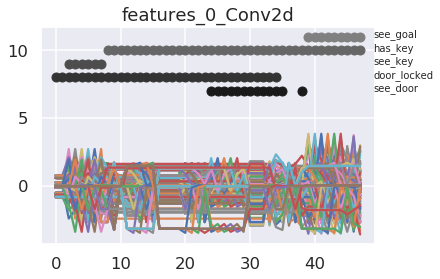

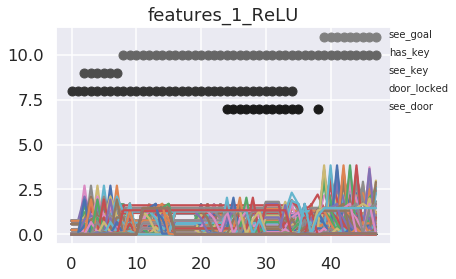

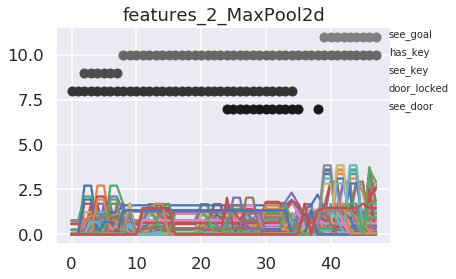

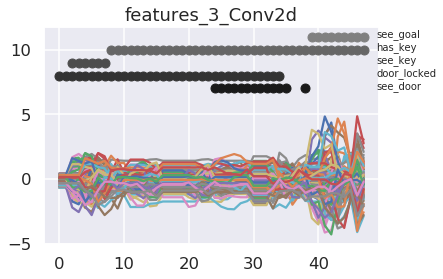

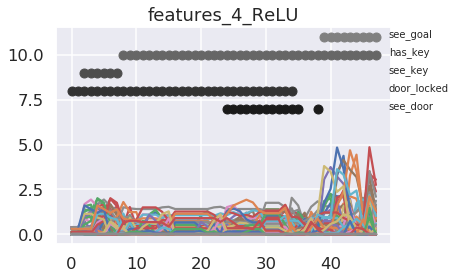

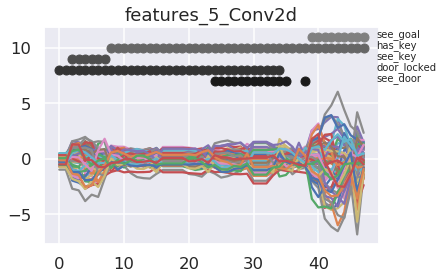

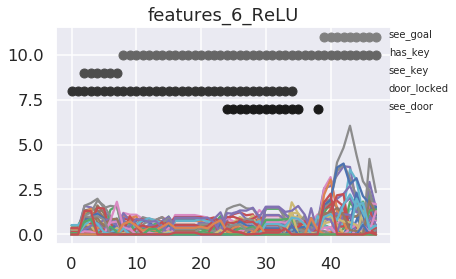

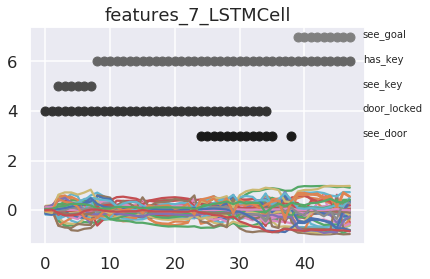

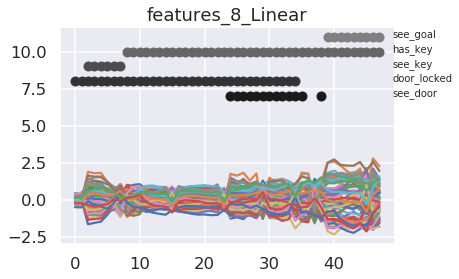

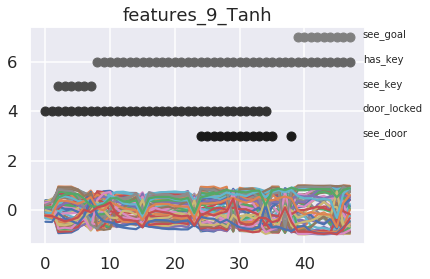

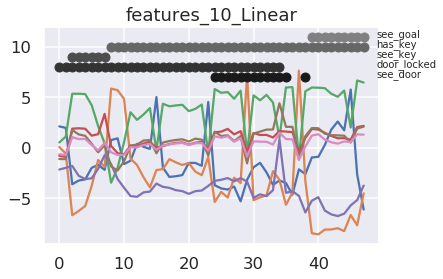

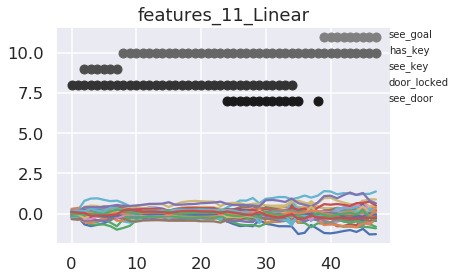

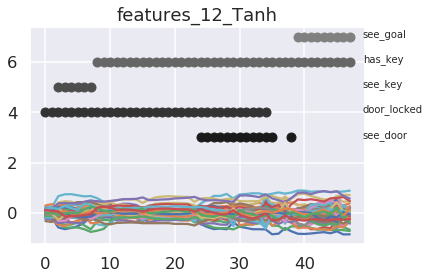

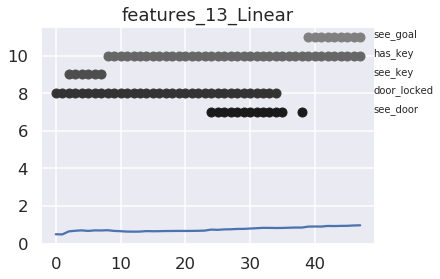

In [4]:
for i, name in enumerate(feature_names):
    ax = plt.plot(np.arange(len(feature_data[i])), feature_data[i])
    for j, key in enumerate(annotation_data.keys()):
        if 'Unnamed' in key:
            pass
        else:
            if ('Tanh' in name) or ('LSTM' in name): 
                m=2 
            else: 
                m=6
            k = (j+m)
            x,y = get_annotations(annotation_data, i, k, key)
            plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
            plt.text(len(feature_data[i])+1, k, key)
    plt.title(feature_names[i])
    plt.show()

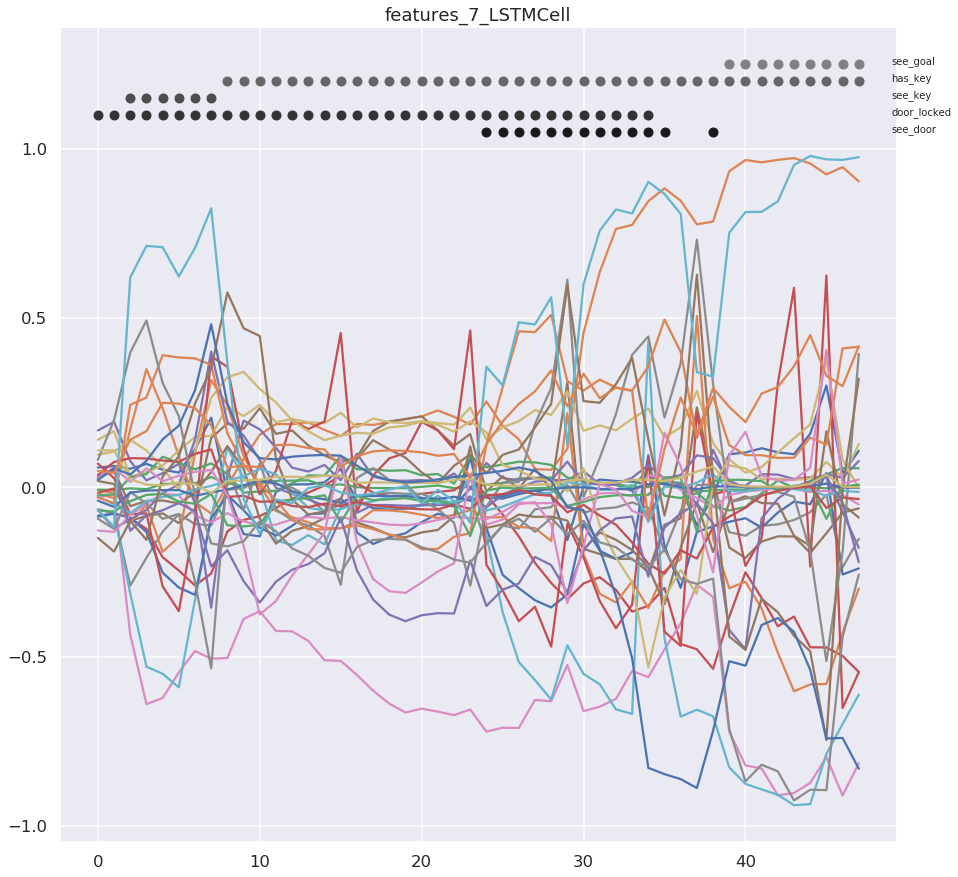

In [75]:
i = 7
name = 'LSTM'
fig, ax = plt.subplots(figsize=[15,15])
plt.plot(np.arange(len(feature_data[i])), feature_data[i][:,::2])
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

In [ ]:
lstm = feature_data[7]

In [80]:
lstm1 = feature_data[7]

In [12]:
angle = lambda x, y : (np.dot(x,y))/(np.linalg.norm(x)*np.linalg.norm(y))

In [13]:
angle(lstm[0],lstm[1])

0.9628566

In [14]:
angle(lstm[0],lstm[2])

0.6874207

In [24]:
angle(lstm[18],lstm[20])

0.25915977

In [39]:
angle(np.random.randn(64),lstm[3])

0.029813514792808863

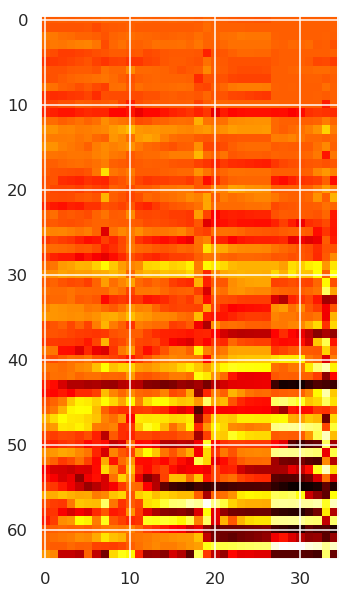

In [72]:
fig = plt.figure(1, figsize=[20,10])
fig.clf()
ax = fig.add_subplot(1, 1, 1)
var_ind = np.argsort(np.std(lstm, axis=0))
ax.imshow(lstm.T[var_ind], cmap='hot', interpolation='nearest')
plt.show()

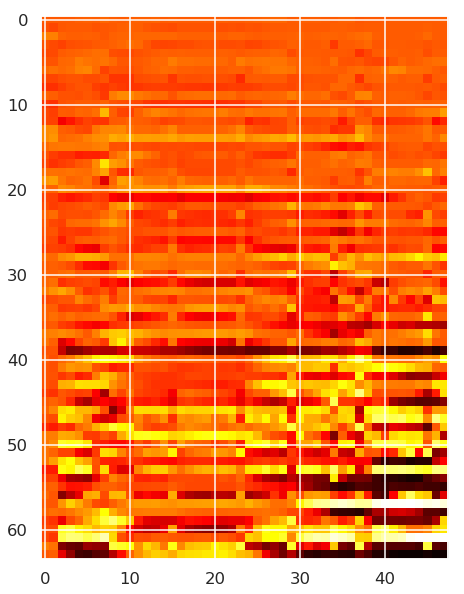

In [78]:
fig = plt.figure(1, figsize=[20,10])
fig.clf()
ax = fig.add_subplot(1, 1, 1)
var_ind = np.argsort(np.std(lstm, axis=0))
ax.imshow(lstm.T[var_ind], cmap='hot', interpolation='nearest')
plt.show()

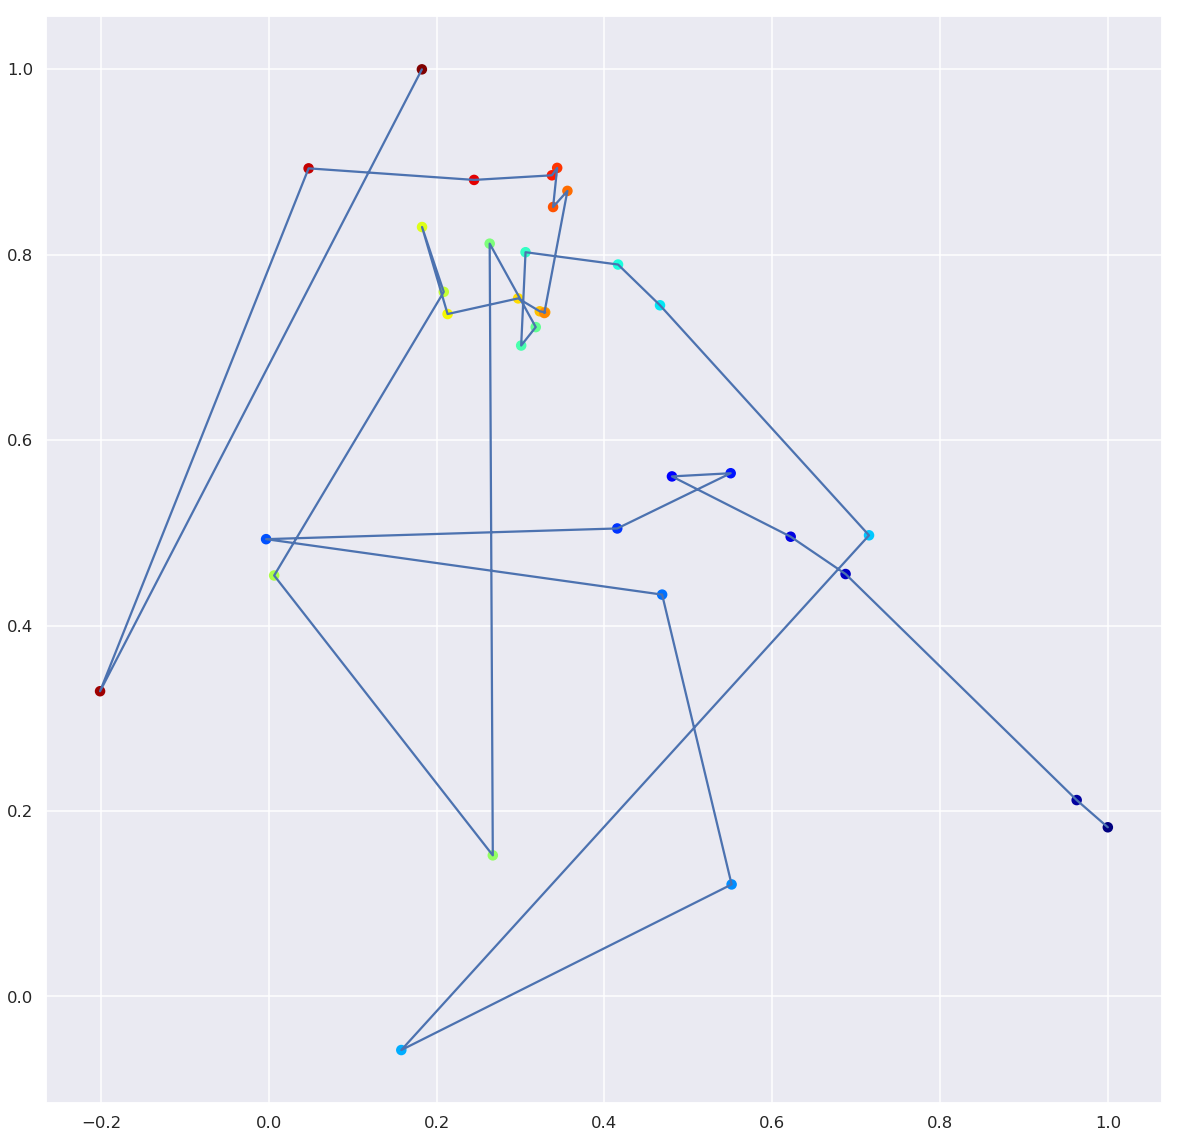

In [58]:
import matplotlib.cm as cm

cmap = cm.jet

angles1 = [angle(lstm[0], lstm[i]) for i in range(len(lstm))]
angles2 = [angle(lstm[-1], lstm[i]) for i in range(len(lstm))]

c = np.linspace(0, 10, len(lstm))

fig = plt.figure(1, figsize=[20,20])
fig.clf()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(angles1,angles2, c=c, cmap=cmap)
ax.plot(angles1,angles2)

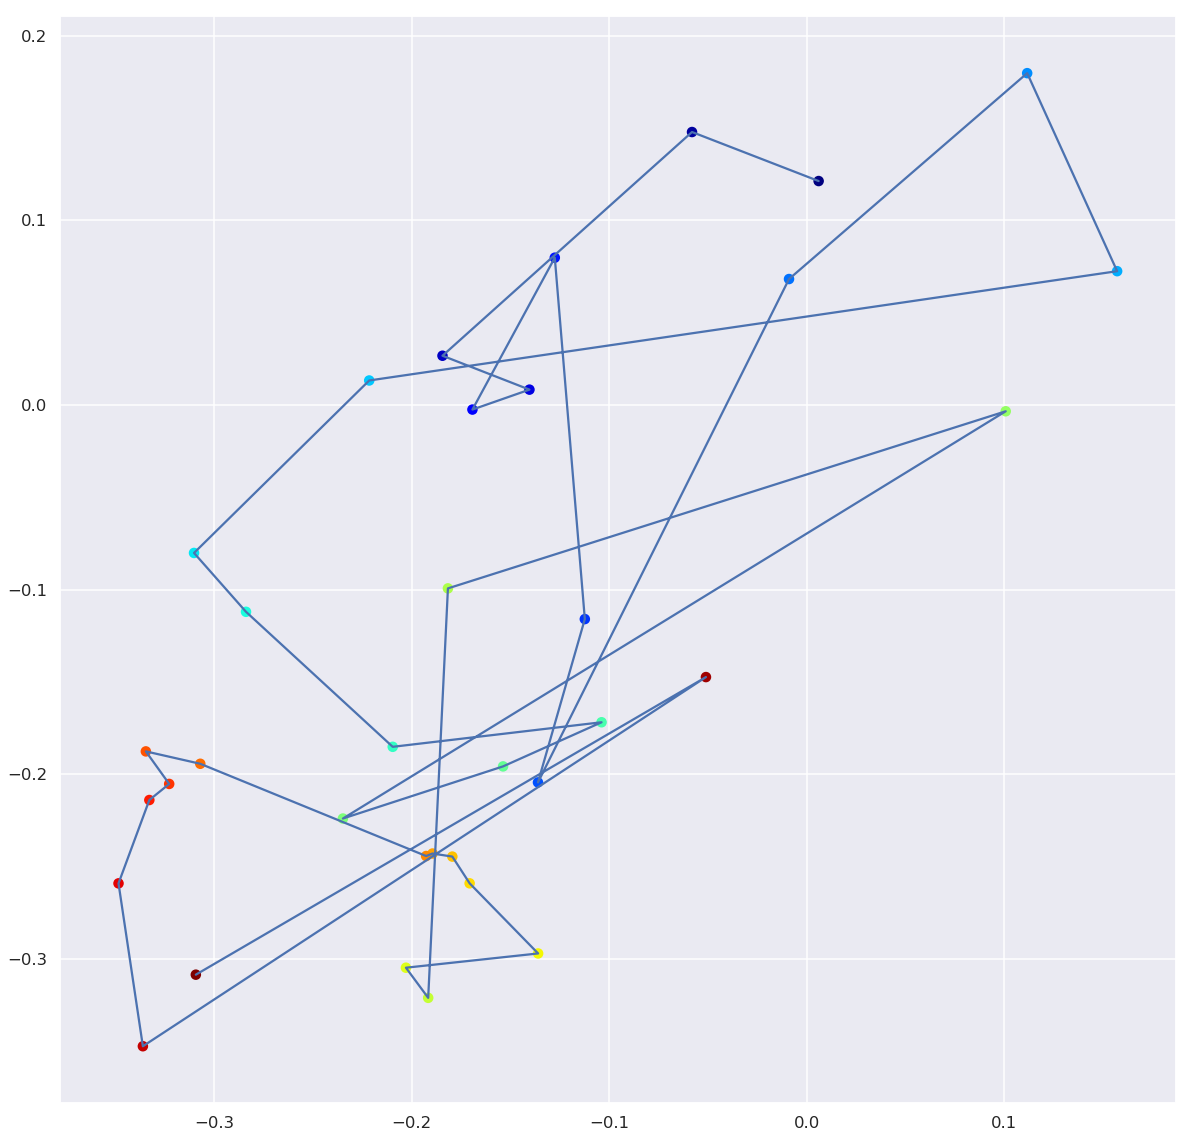

In [57]:
import matplotlib.cm as cm

cmap = cm.jet

anchor1 = np.random.randn(64)
angles1 = [angle(anchor1, lstm[i]) for i in range(len(lstm))]
anchor2 = np.random.randn(64)
angles2 = [angle(anchor2, lstm[i]) for i in range(len(lstm))]

c = np.linspace(0, 10, len(lstm))

fig = plt.figure(1, figsize=[20,20])
fig.clf()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(angles1,angles2, c=c, cmap=cmap)
ax.plot(angles1,angles2)
# for j, key in enumerate(annotation_data.keys()):
#     if 'Unnamed' in key:
#         pass
#     else:
#         m = 20
#         k = (j+m)/m
#         x,y = get_annotations(annotation_data, i, k, key)
#         plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
#         plt.text(len(feature_data[i])+1, k, key)
# plt.title(feature_names[i])
# plt.show()

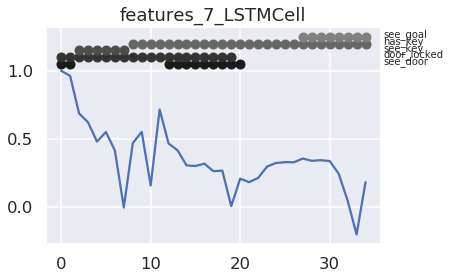

In [48]:
angles = [angle(lstm[0], lstm[i]) for i in range(len(lstm))]
plt.plot(angles)
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

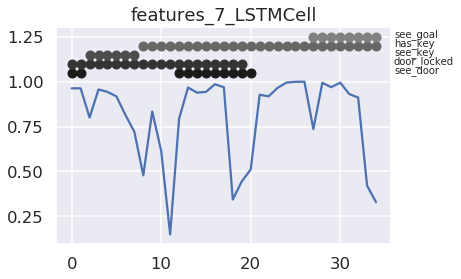

In [31]:
angles = np.concatenate([[angle(lstm[0], lstm[1])],[angle(lstm[i], lstm[i+1]) for i in range(len(lstm)-1)]])
plt.plot(angles)
for j, key in enumerate(annotation_data.keys()):
    if 'Unnamed' in key:
        pass
    else:
        m = 20
        k = (j+m)/m
        x,y = get_annotations(annotation_data, i, k, key)
        plt.plot(x, y, linestyle='none', marker='o', color=(j/10,j/10,j/10))
        plt.text(len(feature_data[i])+1, k, key)
plt.title(feature_names[i])
plt.show()

## okkkk, lets get more data?

In [150]:
feature_names_i

array(['features_0_Conv2d', 'features_1_ReLU', 'features_2_MaxPool2d',
       'features_3_Conv2d', 'features_4_ReLU', 'features_5_Conv2d',
       'features_6_ReLU', 'features_7_LSTMCell', 'features_8_Linear',
       'features_9_Tanh', 'features_10_Linear', 'features_11_Linear',
       'features_12_Tanh', 'features_13_Linear'], dtype='<U20')

In [83]:
# compile all data!
root = 'feature_dir/DoorKey/'
DIRS = [os.path.join(root,DIR) for DIR in os.listdir(root)]

for i, DIR in enumerate(DIRS):
    if i == 0:
        feature_names, feature_data, obss_data, annotation_data = format_data(DIR)
    else:
        feature_names_i, feature_data_i, obss_data_i, annotation_data_i = format_data(DIR)
        assert(np.all([f==i for (f,i) in zip (feature_names,feature_names_i)]))
        for j in range(len(feature_data)):
            feature_data[j] = np.concatenate([feature_data[j],feature_data_i[j]])
        obss_data = np.concatenate([obss_data, obss_data_i])
        annotation_data = annotation_data.append(annotation_data_i)

# for convenience we'll just call the inputs a feature
feature_data.append(obss_data)
feature_names.append('obss_-1')

# compute goal state
annotation_data['goal'] = (annotation_data['has_key'].astype(int) + (annotation_data['door_locked']==False).astype(int)).values

In [253]:
len(obss_data), len(feature_data[0]), annotation_data.shape[0]

(4960, 4960, 4960)

In [6]:
feature_names

['features_12_Tanh',
 'features_3_Conv2d',
 'features_1_ReLU',
 'features_7_LSTMCell',
 'features_5_Conv2d',
 'features_10_Linear',
 'features_8_Linear',
 'features_2_MaxPool2d',
 'features_13_Linear',
 'features_4_ReLU',
 'features_11_Linear',
 'features_0_Conv2d',
 'features_6_ReLU',
 'features_9_Tanh',
 'obss_-1']

In [254]:
scores = []
for i, feature_name in enumerate(feature_names):
    for key in annotation_data.keys():
        if 'Unnamed' in key:
            pass
        else:
            X = feature_data[i]
            y = np.array(annotation_data[key].values).astype(int)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

            SVM = svm.SVC(kernel='linear')

            SVM.fit(X_train,y_train)
            score = SVM.score(X_test,y_test)
            scores.append([feature_name, key, score])
            
scores_frame = pd.DataFrame(columns=['feature_name', 'key', 'score'], data=scores)

In [255]:
scores_frame['order'] = scores_frame['feature_name'].apply(lambda name : int(name.split('_')[1])+1 )
scores_frame = scores_frame.sort_values(by=['order'])

Text(0.5, 1.0, 'Image through LSTM linear information content')

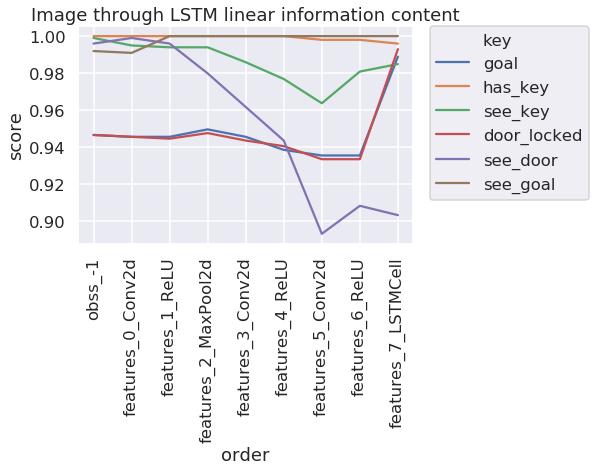

In [257]:
frame = scores_frame[scores_frame['order']<9]
labels = frame['feature_name'].unique()
ax = sns.lineplot(x='order', y='score', hue='key', data=frame)
ax.set_xticks(ticks=range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Image through LSTM linear information content')

In [82]:
from sklearn.decomposition import PCA

def get_EV(dataset):
    data = dataset.reshape(-1,dataset.shape[-1])
    pca = PCA()
    pca.fit(data)

    return pca.explained_variance_ratio_

def get_PR(dataset):
    data = dataset.reshape(-1,dataset.shape[-1])
    pca = PCA()
    pca.fit(data)

    u = pca.explained_variance_
    pr = np.square(u.sum())/np.square(u).sum()
    
    return pr

def svd_whiten(X):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    X_white = np.dot(U, Vt)

    return X_white

def hist(d):
    pd.DataFrame(d).hist() 

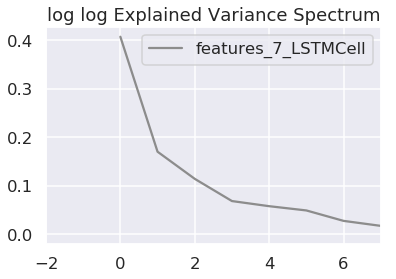

In [119]:
EVs = []
titles = []
for i, (feature_name, feature_datum) in enumerate(zip(feature_names, feature_data)):
#     if feature_name in ['features_1_ReLU', 'features_4_ReLU', 'features_6_ReLU', 'features_7_LSTMCell']:
    if feature_name in ['features_7_LSTMCell']:
        EV = get_EV(feature_datum)
#         EV = EV/np.max(EV)
        EV_frame = pd.DataFrame(columns=[feature_name],data=EV)
        ax = sns.lineplot(data=EV_frame, palette=[sns.color_palette()[i]])
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.set_xlim([-2,7])
        ax.set_title('log log Explained Variance Spectrum')

In [112]:
feature_names[7]

'features_7_LSTMCell'

In [154]:
state = annotation_data['goal'].values[:51]
x[state==0].shape

(19, 64)

In [153]:
x = feature_data[7][:51]
x.shape

(51, 64)

In [114]:
x = feature_data[7]
n = 3
pcs = ['pc'+str(i) for i in range(n)]
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=pcs)

In [115]:
principalDf.shape

(4960, 3)

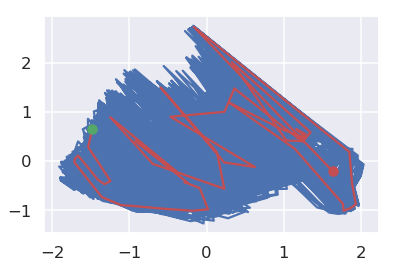

In [116]:
ax = plt.plot(principalDf.values[:,0],principalDf.values[:,1])
ax = plt.plot(principalDf.values[:51,0],principalDf.values[:51,1], c='r')
ax = plt.scatter(principalDf.values[0,0],principalDf.values[0,1], c='g', zorder=3)
ax = plt.scatter(principalDf.values[50,0],principalDf.values[50,1], c='r', zorder=3)

In [145]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()

state = annotation_data['goal'].values[:51]
x[state==0]

trace1 = go.Scatter3d(
    x=principalDf.values[:2000,0],
    y=principalDf.values[:2000,1],
    z=principalDf.values[:2000,2],
#     x=principalDf.values[:51,0],
#     y=principalDf.values[:51,1],
#     z=principalDf.values[:51,2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.2
        ),
        opacity=0.1
    )
)


trace2 = go.Scatter3d(
    x=principalDf.values[:51,0],
    y=principalDf.values[:51,1],
    z=principalDf.values[:51,2],
    mode='lines+markers',
    line=dict(
        width=8
    ),
    marker=dict(
        color='rgb(127, 127, 127)',
        size=8,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace3 = go.Scatter3d(
    x=[principalDf.values[0,0]],
    y=[principalDf.values[0,1]],
    z=[principalDf.values[0,2]],
    mode='markers',
    marker=dict(
        color='rgb(250, 250, 20)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
)

trace4 = go.Scatter3d(
    x=[principalDf.values[50,0]],
    y=[principalDf.values[50,1]],
    z=[principalDf.values[50,2]],
    mode='markers',
    marker=dict(
        color='rgb(50, 250, 250)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='DoorKey-16x16')

In [162]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()

start = 0
end = 51
state = annotation_data['goal'].values[start:end]
ep = principalDf.values[start:end]

traces = []
traces.append(go.Scatter3d(
    x=principalDf.values[:2000,0],
    y=principalDf.values[:2000,1],
    z=principalDf.values[:2000,2],
#     x=principalDf.values[:51,0],
#     y=principalDf.values[:51,1],
#     z=principalDf.values[:51,2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.2
        ),
        opacity=0.1
    )
))

for s in np.unique(state):
    color = 'rgb({}, 200, 200)'.format(60+s*90)
    print(color)
    traces.append(go.Scatter3d(
        x=ep[state==s,0],
        y=ep[state==s,1],
        z=ep[state==s,2],
        mode='lines+markers',
        line=dict(
            width=8
        ),
        marker=dict(
            color=color,
            size=8,
            symbol='circle',
            line=dict(
                color='rgb(204, 204, 204)',
                width=1
            ),
            opacity=0.9
        )
    ))

traces.append(go.Scatter3d(
    x=[principalDf.values[start,0]],
    y=[principalDf.values[start,1]],
    z=[principalDf.values[start,2]],
    mode='markers',
    marker=dict(
        color='rgb(250, 250, 20)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
))

traces.append(go.Scatter3d(
    x=[principalDf.values[end-1,0]],
    y=[principalDf.values[end-1,1]],
    z=[principalDf.values[end-1,2]],
    mode='markers',
    marker=dict(
        color='rgb(50, 250, 250)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(250, 250, 20)',
            width=1
        ),
        opacity=0.9
    )
))

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='DoorKey-16x16')

rgb(60, 200, 200)
rgb(150, 200, 200)
rgb(240, 200, 200)


In [236]:
annotation_data.head()

,Unnamed: 0,see_door,door_locked,see_key,has_key,see_goal
0,0,False,True,False,False,False
1,1,False,True,False,False,False
2,2,False,True,False,False,False
3,3,False,True,False,False,False
4,4,False,True,False,False,False


In [239]:
goal = []
for v in annotation_data.T:
    print(v)
    if v['has_key']:
        print(v['has_key'])

0


TypeError: 'int' object is not subscriptable

In [248]:
annotation_data['goal'] = (annotation_data['has_key'].astype(int) + (annotation_data['door_locked']==False).astype(int)).values

In [249]:
annotation_data

,Unnamed: 0,see_door,door_locked,see_key,has_key,see_goal,goal
0,0,False,True,False,False,False,0
1,1,False,True,False,False,False,0
2,2,False,True,False,False,False,0
3,3,False,True,False,False,False,0
4,4,False,True,False,False,False,0
5,5,False,True,False,False,False,0
6,6,False,True,False,False,False,0
7,7,False,True,False,False,False,0
8,8,False,True,False,False,False,0
9,9,True,True,False,False,False,0


In [288]:
np.square(sum(x))/sum(np.square(x))

2.8985508237765263